In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def optimal_rp(seller_value, val_fn, val_fn_params, val_fn_range, n_bidders, n_sims = 1000):
    # run simulations of auctions n_sims times, return optimal reserve price as a function of seller_value
    rev_dict = {} # {expected_revenue : reserve_price}
    sim_auc = [sorted(val_fn(*(val_fn_params + [n_bidders])), reverse=True)[:2] for i in range(n_sims)] # simulation
    
    for reserve_pr in np.arange(seller_value, val_fn_range[-1] + 0.1, 0.1): # iterate every possible reserve_pr by step * prob = 0.1
        rev_list = [(max(reserve_pr, second_pr) - seller_value) if first_pr > reserve_pr else 0 for [first_pr, second_pr] in sim_auc] # revenue from each simulated auction
        if len(rev_list) > 0:
            rev_dict[sum(rev_list) / n_sims] = reserve_pr # expected_revenue = avg_rev * prob
    try:
        return rev_dict[max(rev_dict.keys())] #return optimal reserve price
    except:
        return None

In [17]:
# test the function
optimal_rp(0.2, np.random.uniform, [0, 1], [0,1], 2, n_sims = 1000)

0.60000000000000009

In [18]:
val_fn_list = [np.random.uniform , np.random.uniform, np.random.triangular, np.random.exponential]
val_fn_params_list = [[0, 1], [5, 10], [0, 0.5, 1], [1.0/1.0]]
val_fn_range_list = [[0,1], [5, 10], [0, 1], [0, 10]]

titles = ['uniform', 'uniform', 'triagle', 'exponential (lambda=1)']

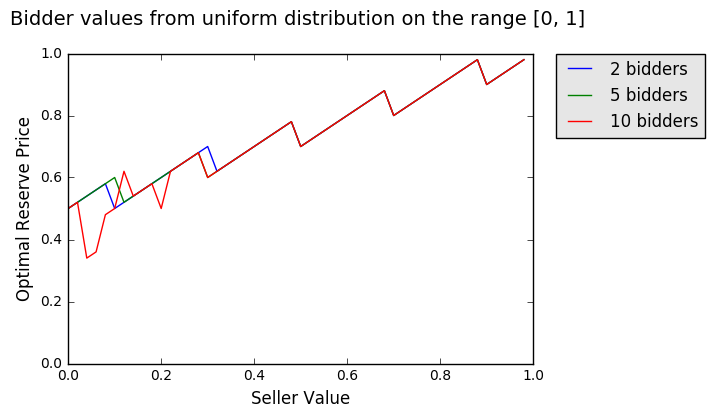

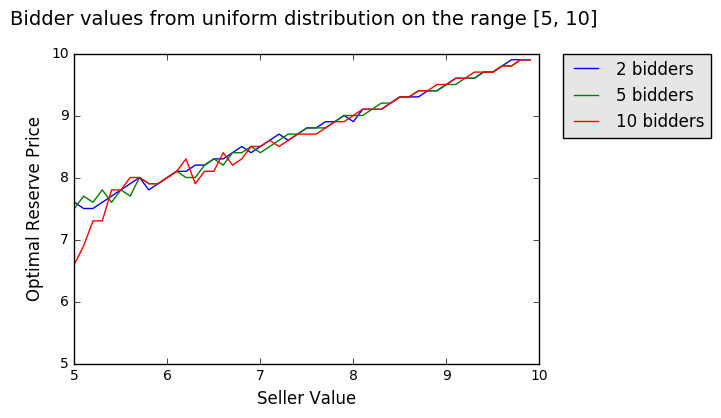

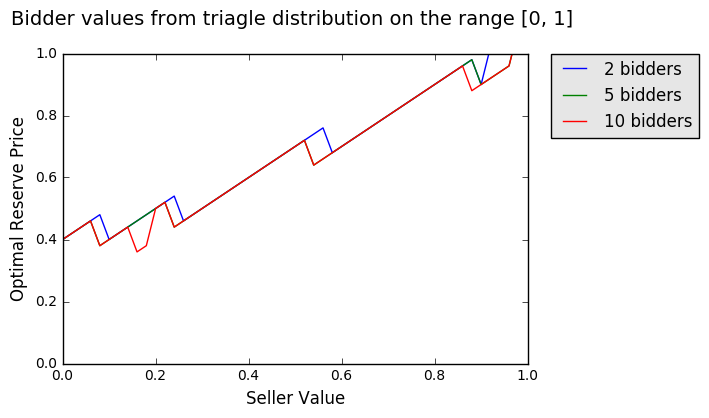

KeyboardInterrupt: 

In [19]:
%%time
plt.close()
for plot_number in range(4):
    val_fn = val_fn_list[plot_number]
    val_fn_params = val_fn_params_list[plot_number]
    val_fn_range = val_fn_range_list[plot_number]
    seller_values = np.arange(val_fn_range[0], val_fn_range[1], (val_fn_range[1] - val_fn_range[0])/50.0)
    
    fig, ax = plt.subplots()
    for n_bidders in [2, 5, 10]:
        opt_reserve_prs = [optimal_rp(x, val_fn, val_fn_params, val_fn_range, n_bidders, n_sims = 10000) 
                           for x in seller_values]
        ax.plot(seller_values, opt_reserve_prs, label='%s bidders' % (n_bidders))
        ax.set_title("Bidder values from %s distribution on the range %s \n" 
                    %(titles[plot_number], str(val_fn_range)), fontsize=14)
        ax.set_xlim(val_fn_range)
        ax.set_ylim(val_fn_range)
        ax.set_xlabel('Seller Value', fontsize=12)
        ax.set_ylabel('Optimal Reserve Price', fontsize=12)
    
    legend = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
    frame = legend.get_frame()
    frame.set_facecolor('0.90')
    
    plt.show()
    #plt.savefig('plot 3-%s.png' %plot_number, dpi=300)

1. It does not matter how many bidders are there (?)
2. More shading with lower seller values
3. More variance with larger seller values in exponetial distribution